
---

## Resources to refer:
1. https://spark.apache.org/docs/latest/rdd-programming-guide.html#resilient-distributed-datasets-rdds
2. https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.SparkContext.html


---

# Spark
- Big data processing framework.
- Functional programming - parallelizing the operations

"Spark is an open source in-memory application framework for distributed data processing and iterative analysis on massive data volumes."

Spark is written mainly in Scala and runs on JVMs.

### Benefits;
1. Speed because of in-memory computations
2. Easy API access, Python, SQL, Scala, Java

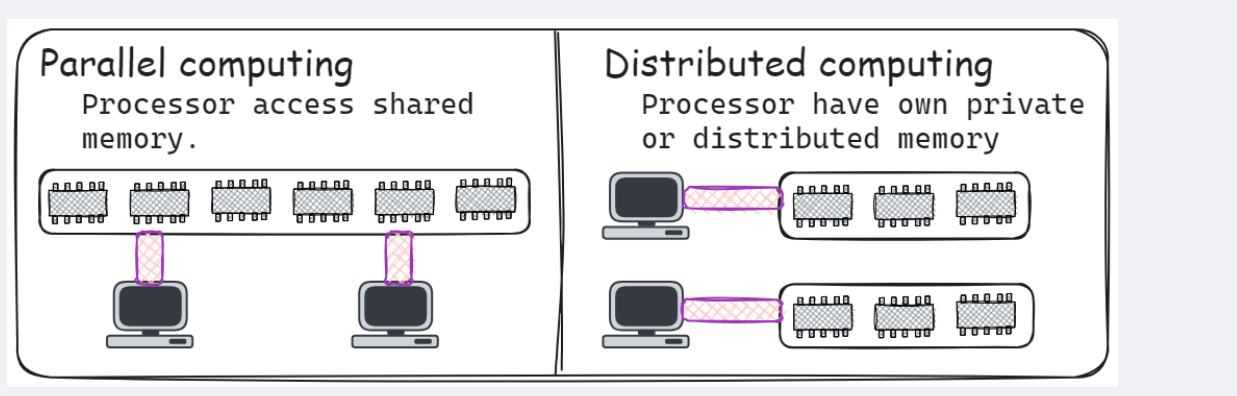


---
## What Is Spark?
Apache Spark is made up of several components, At its core, Spark is a generic engine for processing large amounts of data.

- Spark is written in Scala and runs on the JVM.
- Spark has built-in components for processing streaming data, machine learning, graph processing, and even interacting with data via SQL.


## What Is PySpark?
Spark is implemented in Scala, a language that runs on the JVM, so how can you access all that functionality via Python?

PySpark is the answer.


- PySpark communicates with the Spark Scala-based API via the Py4J library. Py4J isn’t specific to PySpark or Spark. Py4J allows any Python program to talk to JVM-based code.

There are two reasons that PySpark is based on the functional paradigm:

- Spark’s native language, Scala, is functional-based.
- Functional code is much easier to parallelize.

---

### What is a cluster?
A pool of computers working together but viewed as a single system
- Example cluster configuration
	- Worker Node Capacity
		- 16 CPU cores
		- 64 GB RAM
- Cluster Capacity
	- 160 CPU cores
	- 640 GB RAM

  

# Spark

• Spark is a distributed computing platform
• Any Spark application is a distributed application which runs on a cluster
• Cluster technologies for Apache Spark
	- Spark Standalone
	- Hadoop YARN
	- Kubernetes
	- Apache Mesos



## Why Spark
- Fast and general engine for large-scale data processing
- Spark can slice and dice the data up, it can distribute the processing amongst a huge cluster of computers and take a data analysis problem that's just too big to run on one machine and divide it and conquer it by splitting it up amongst multiple machines.
- Run programs up to 100x faster than Hadoop MapReduce in memory or 10x faster on disk. (But in reality it is faster about 3-4x).
- DAG Engine (Directed Acyclic Graph) optimizes workflows
- Code in python, Java, Scala, R
- Built around one main concept: The RDD



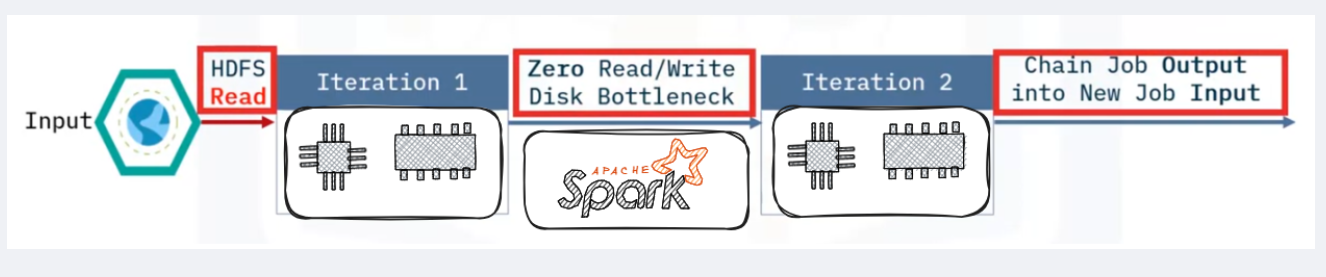

#### **Input Stage**

* Data is read once from **HDFS (Hadoop Distributed File System)**.
* This is the **initial load** of data into memory.

---

### **Iteration 1**

* The first computation begins (e.g., map, reduce, filtering).
* Data is **processed in-memory** by Spark across distributed computing units (CPUs/cores).
* Spark uses **RDDs** (Resilient Distributed Datasets) to cache data in memory, avoiding repeated disk I/O.

---

### **Zero Read/Write Disk Bottleneck**

* This is a **key advantage** of Spark:

  * Unlike Hadoop MapReduce (which writes intermediate results to disk), **Spark keeps intermediate data in memory**.
  * It eliminates **read/write disk overhead**, resulting in **faster performance**, especially for **iterative algorithms** (e.g., machine learning, graph processing).

---

### **Iteration 2**

* Since the data is already cached from Iteration 1, Iteration 2 begins without needing to read from disk again.
* Spark continues **in-memory computation** efficiently.

---

### **Chaining Job Output into New Job Input**

* Output from one job (iteration) can directly feed into the next.
* This chaining is **seamless in Spark** due to its DAG (Directed Acyclic Graph) execution model.

---

### **Summary**

| Feature                    | Apache Spark Advantage                         |
| -------------------------- | ---------------------------------------------- |
| Disk I/O                   | Minimized after first read (in-memory caching) |
| Iterative Computation      | Highly efficient due to memory persistence     |
| Intermediate Data Handling | In-memory (not written to disk)                |
| Job Chaining               | Direct, efficient chaining of transformations  |

----

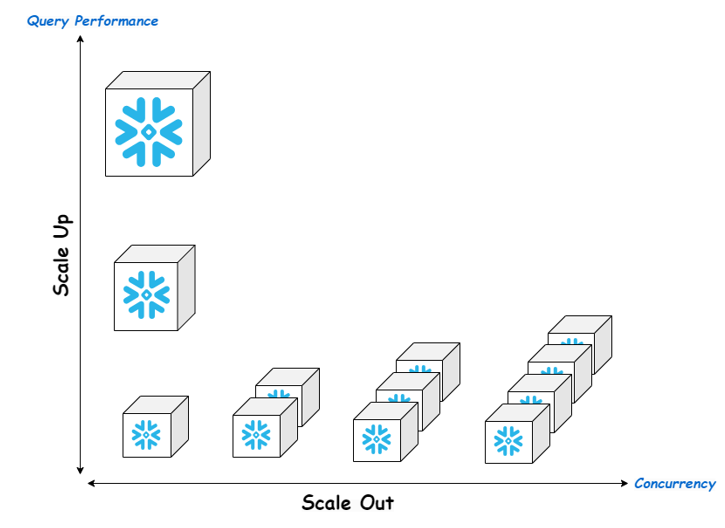

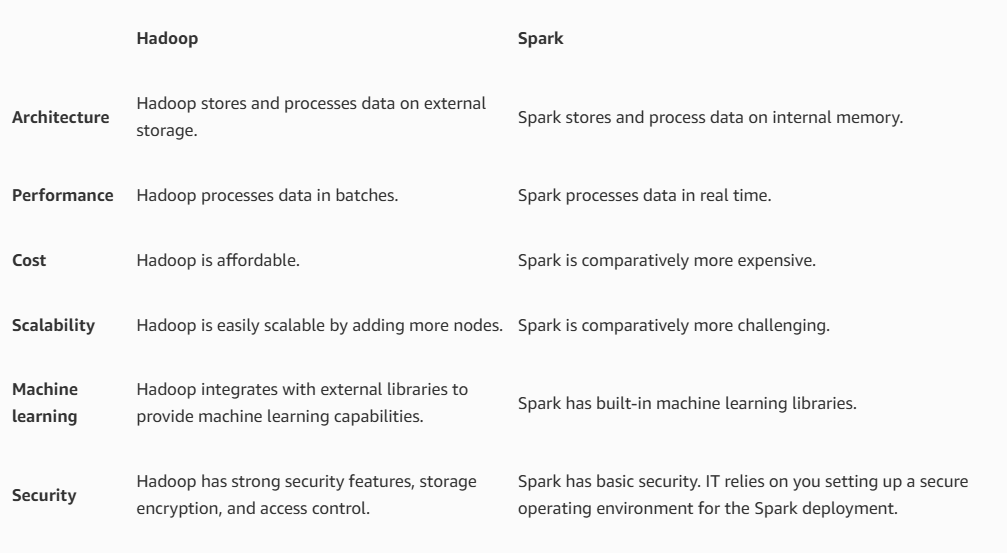

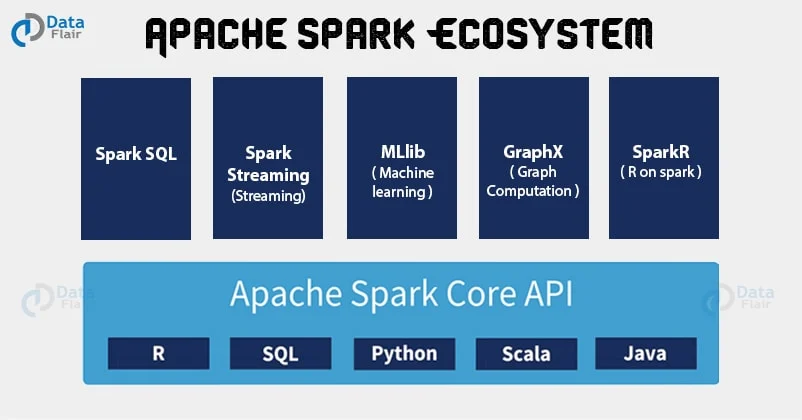

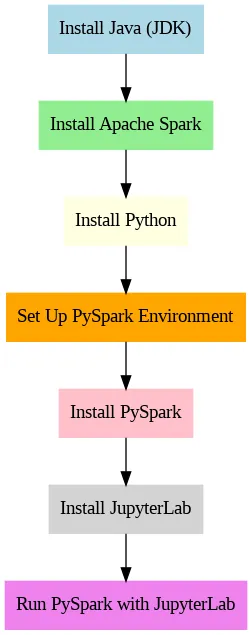

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("DataFrameExample") \
    .getOrCreate()

# Create a DataFrame from a list of tuples
data = [("John", 25), ("Alice", 30), ("Bob", 35)]
df = spark.createDataFrame(data, ["Name", "Age"])

# Show the DataFrame
df.show()

# Filter the DataFrame
filtered_df = df.filter(df.Age > 30)
filtered_df.show()

# Perform aggregation
agg_df = df.groupBy("Name").avg("Age")
agg_df.show()

# Stop SparkSession when done
spark.stop()

+-----+---+
| Name|Age|
+-----+---+
| John| 25|
|Alice| 30|
|  Bob| 35|
+-----+---+

+----+---+
|Name|Age|
+----+---+
| Bob| 35|
+----+---+

+-----+--------+
| Name|avg(Age)|
+-----+--------+
| John|    25.0|
|  Bob|    35.0|
|Alice|    30.0|
+-----+--------+



# RDDs

## Resilient Distributed Datasets (RDDs)
Spark revolves around the concept of a resilient distributed dataset (RDD), which is a fault-tolerant collection of elements that can be operated on in parallel. There are two ways to create RDDs: parallelizing an existing collection in your driver program, or referencing a dataset in an external storage system, such as a shared filesystem, HDFS, HBase, or any data source offering a Hadoop InputFormat.


Parallelized collections are created by calling SparkContext’s parallelize method on an existing iterable or collection in your driver program. The elements of the collection are copied to form a distributed dataset that can be operated on in parallel.

---
## Resilient Distributed Datasets, or RDDs.

RDDs are the foundation of data processing in PySpark and allow you to work with large datasets across many machines.

If you think about a dataset as a big table of information, RDDs are how PySpark breaks that table into smaller pieces and processes them in parallel.
The best part? RDDs are built to be fault-tolerant, so even if a part of your system crashes, PySpark can still recover your data and finish the job.

---

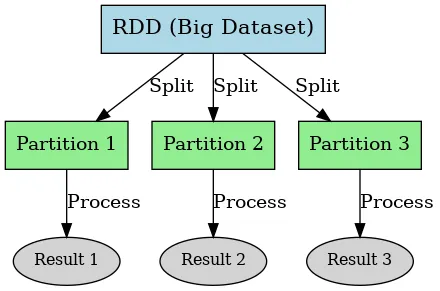

In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("DataFrameExample") \
    .getOrCreate()

data = [1, 2, 3, 4, 5]
distData = spark.sparkContext.parallelize(data)

total = distData.reduce(lambda a, b: a + b)

print(total)

spark.stop()

15


### What is an RDD?
An RDD is essentially a collection of data elements, like a list in Python, but spread out across different computers in a cluster. RDDs have some key features that make them unique:

- Immutable: Once an RDD is created, you can’t modify it. However, you can apply transformations to create new RDDs based on existing ones.
- Distributed: The data is divided into smaller parts and distributed across many machines.
- Fault-Tolerant: PySpark automatically tracks how the data was transformed so it can recover lost data if there’s a failure.

### Spark Context:
Main entry point for Spark functionality. A SparkContext represents the connection to a Spark cluster, and can be used to create RDD and broadcast variables on that cluster.


In [ ]:
"""
Only one SparkContext should be active per JVM. You must stop() the active SparkContext before creating a new one.
"""

from pyspark.context import SparkContext
sc = SparkContext('local', 'test')
sc2 = SparkContext('local', 'test2')


# ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=test, master=local) created by __init__ at <ipython-input-6-cd902f1fc16a>:2

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=test, master=local) created by __init__ at <ipython-input-6-cd902f1fc16a>:2 

In [ ]:

from pyspark.context import SparkContext
sc = SparkContext()

data = [1, 2, 3, 4, 5]
distData = sc.parallelize(data)

total = distData.reduce(lambda a, b: a + b)

print(total)

sc.stop()

15


In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("MySparkApp") \
    .config("spark.some.config.option", "some-value") \
    .master("local[*]") \
    .config("spark.executor.memory", "2g") \
    .getOrCreate()


 # Set master to local with all available cores
 # * implies to use available threads
 # Set executor memory to 2GB



# df = spark.read.csv("")
# df.show()

# Stop SparkSession when done
spark.stop()

## RDD
It is an abstraction for data.
- Core data structure in Spark, immutable, fault-tolerant, distributed.
- Designed for distributed computing, dividing the dataset into logical partitions


- **Transformations**: (Map, Filter, reduce, union, intersection, subtract, cartesian)
- Transformations create RDDs from each other
- Dataset and Dataframes are built on top of RDDs.

- **Actions:** collect, count, countByValue, take, top, reduce

- Lazy Evaluation: Nothing actually happens until an action is called.

> Spark actions are eager and transformations are lazy.

> Every spark application consists of a driver program that runs the user's main functions and runs multiple parallel operations on a cluster.

---

## RDD Operations
RDDs support two types of operations:
- **transformations**, which create a new dataset from an existing one, and
- **actions**, which return a value to the driver program after running a computation on the dataset.

For example, `map` is a transformation that passes each dataset element through a function and returns a new RDD representing the results.

On the other hand, `reduce` is an action that aggregates all the elements of the RDD using some function and returns the final result to the driver program (although there is also a parallel `reduceByKey` that returns a distributed dataset).

> All transformations in Spark are lazy, in that they do not compute their results right away. Instead, they just remember the transformations applied to some base dataset (e.g. a file).

> The transformations are only computed when an action requires a result to be returned to the driver program. This design enables Spark to run more efficiently. For example, we can realize that a dataset created through map will be used in a reduce and return only the result of the reduce to the driver, rather than the larger mapped dataset.

By default, each transformed RDD may be recomputed each time you run an action on it. However, you may also persist an RDD in memory using the persist (or cache) method, in which case Spark will keep the elements around on the cluster for much faster access the next time you query it. There is also support for persisting RDDs on disk, or replicated across multiple nodes.

---

In [11]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create SparkSession
spark = SparkSession.builder.appName("SparkContextExample").getOrCreate()

# Access SparkContext from SparkSession
sc = spark.sparkContext

print("=== SparkContext Information ===")
print(f"Spark Version: {sc.version}")
print(f"Application Name: {sc.appName}")
print(f"Application ID: {sc.applicationId}")
print(f"Master: {sc.master}")
print(f"Default Parallelism: {sc.defaultParallelism}")
print(f"Python Version: {sc.pythonVer}")

print("\n=== Creating RDDs with SparkContext ===")

# 1. Create RDD from a list
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
numbers_rdd = sc.parallelize(numbers)
print(f"Numbers RDD: {numbers_rdd.collect()}")

# 2. Create RDD from a range
range_rdd = sc.range(1, 11)
print(f"Range RDD: {range_rdd.collect()}")

# 3. Operations on RDDs
squares_rdd = numbers_rdd.map(lambda x: x ** 2)
print(f"Squares: {squares_rdd.collect()}")

even_numbers = numbers_rdd.filter(lambda x: x % 2 == 0)
print(f"Even numbers: {even_numbers.collect()}")

sum_result = numbers_rdd.reduce(lambda x, y: x + y)
print(f"Sum using reduce: {sum_result}")

print("\n=== Working with Text Data ===")

# Create RDD from text data
text_data = ["Hello World", "PySpark is awesome", "SparkContext and SparkSession"]
text_rdd = sc.parallelize(text_data)

# Split words and flatten
words_rdd = text_rdd.flatMap(lambda line: line.split())
print(f"Words: {words_rdd.collect()}")

# Word count example
word_counts = words_rdd.map(lambda word: (word, 1)).reduceByKey(lambda x, y: x + y)
print(f"Word counts: {word_counts.collect()}")

print("\n=== Converting between RDD and DataFrame ===")

# Convert RDD to DataFrame
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

# Sample data
people_data = [("Alice", 25), ("Bob", 30), ("Charlie", 35)]
people_rdd = sc.parallelize(people_data)

# Define schema
schema = StructType([
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True)
])

# Convert RDD to DataFrame
people_df = spark.createDataFrame(people_rdd, schema)
print("DataFrame from RDD:")
people_df.show()

# Convert DataFrame back to RDD
df_to_rdd = people_df.rdd
print(f"RDD from DataFrame: {df_to_rdd.collect()}")

print("\n=== Reading Files with SparkContext ===")

# Example: Reading a text file (if you have one)
# text_file_rdd = sc.textFile("path/to/your/file.txt")
# print(f"First line: {text_file_rdd.first()}")

# For demonstration, let's create a sample text file content
sample_text = ["Line 1: Hello", "Line 2: World", "Line 3: From Spark"]
text_rdd = sc.parallelize(sample_text)
first_line = text_rdd.first()
print(f"First line: {first_line}")

# Count lines
line_count = text_rdd.count()
print(f"Number of lines: {line_count}")

print("\n=== Broadcast Variables ===")

# Create a broadcast variable
broadcast_dict = sc.broadcast({"key1": "value1", "key2": "value2"})

def lookup_value(key):
    return broadcast_dict.value.get(key, "Not found")

keys_rdd = sc.parallelize(["key1", "key2", "key3"])
results = keys_rdd.map(lookup_value)
print(f"Broadcast lookup results: {results.collect()}")

print("\n=== Accumulators ===")

# Create an accumulator
counter = sc.accumulator(0)

def count_even(x):
    if x % 2 == 0:
        counter.add(1)
    return x

numbers_rdd.map(count_even).collect()
print(f"Count of even numbers using accumulator: {counter.value}")

print("\n=== Partitioning Information ===")
print(f"Number of partitions in numbers_rdd: {numbers_rdd.getNumPartitions()}")
print(f"Partitions content: {numbers_rdd.glom().collect()}")

# Stop the SparkSession (which also stops the SparkContext)
spark.stop()

=== SparkContext Information ===
Spark Version: 3.5.1
Application Name: SparkContextExample
Application ID: local-1751525792012
Master: local[*]
Default Parallelism: 2
Python Version: 3.11

=== Creating RDDs with SparkContext ===
Numbers RDD: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Range RDD: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Squares: [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
Even numbers: [2, 4, 6, 8, 10]
Sum using reduce: 55

=== Working with Text Data ===
Words: ['Hello', 'World', 'PySpark', 'is', 'awesome', 'SparkContext', 'and', 'SparkSession']
Word counts: [('PySpark', 1), ('awesome', 1), ('and', 1), ('Hello', 1), ('World', 1), ('is', 1), ('SparkContext', 1), ('SparkSession', 1)]

=== Converting between RDD and DataFrame ===
DataFrame from RDD:
+-------+---+
|   name|age|
+-------+---+
|  Alice| 25|
|    Bob| 30|
|Charlie| 35|
+-------+---+

RDD from DataFrame: [Row(name='Alice', age=25), Row(name='Bob', age=30), Row(name='Charlie', age=35)]

=== Reading Files with SparkContext ===
First line

In [3]:
# let's first download the file, as spark cannot read data from http
# PySpark is designed to read from distributed file systems like HDFS, S3, or local file systems, not from web URLs.


download_url = "https://raw.githubusercontent.com/KirkYagami/PySpark_Training/refs/heads/main/PySpark/03_data/sf-fire-calls.csv"

import requests
response = requests.get(download_url)

if response.status_code ==200:
  with open('sf-fire-calls.csv', 'wb') as f:
    f.write(response.content)
else:
  print("Failed to download the file")


In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, year, to_date

spark = SparkSession.builder.appName("SimpleApp").getOrCreate()

raw_fire_df = spark.read \
            .format("csv") \
            .option("header", "true") \
            .option("inferSchema", "true") \
            .load('sf-fire-calls.csv')

print("Schema of the dataset:")
raw_fire_df.printSchema()

print("\nFirst 5 rows:")
raw_fire_df.show(12)

filtered_df = raw_fire_df.filter(year(to_date(col("CallDate"), "MM/dd/yyyy")) == 2018)

selected_df = filtered_df.select("CallNumber", "CallDate", "CallType", "City")

print(f"\nFiltered data count: {selected_df.count()}")
selected_df.show(10)

selected_df.write.mode("overwrite").parquet("/content/fire_calls_output")

print("Data saved successfully!")

spark.stop()

Schema of the dataset:
root
 |-- CallNumber: integer (nullable = true)
 |-- UnitID: string (nullable = true)
 |-- IncidentNumber: integer (nullable = true)
 |-- CallType: string (nullable = true)
 |-- CallDate: string (nullable = true)
 |-- WatchDate: string (nullable = true)
 |-- CallFinalDisposition: string (nullable = true)
 |-- AvailableDtTm: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Zipcode: integer (nullable = true)
 |-- Battalion: string (nullable = true)
 |-- StationArea: string (nullable = true)
 |-- Box: string (nullable = true)
 |-- OriginalPriority: string (nullable = true)
 |-- Priority: string (nullable = true)
 |-- FinalPriority: integer (nullable = true)
 |-- ALSUnit: boolean (nullable = true)
 |-- CallTypeGroup: string (nullable = true)
 |-- NumAlarms: integer (nullable = true)
 |-- UnitType: string (nullable = true)
 |-- UnitSequenceInCallDispatch: integer (nullable = true)
 |-- FirePreventionDistrict: str

## Dataframe

In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark import SparkFiles

def main():
    spark = SparkSession.builder.appName("SimpleApp").getOrCreate()
    sc = spark.sparkContext

    data_file_https_url = "https://raw.githubusercontent.com/KirkYagami/PySpark_Training/main/PySpark/03_data/sf-fire-calls.csv"
    sc.addFile(data_file_https_url)
    filePath = 'file://' + SparkFiles.get('sf-fire-calls.csv')
    raw_fire_df = spark.read.csv(filePath, header=True, inferSchema=True)

    print("Schema of the dataset:")
    raw_fire_df.printSchema()

    print("\nFirst 5 rows:")
    raw_fire_df.show(5)


    selected_df = raw_fire_df.select("CallNumber", "CallDate", "CallType", "City")

    print(f"\nRaw data count: {selected_df.count()}")
    selected_df.show(10)

    selected_df.write.mode("overwrite").parquet("/content/fire_calls_output")

    print("Data saved successfully!")

    spark.stop()

if __name__ == "__main__":
    main()

Schema of the dataset:
root
 |-- CallNumber: integer (nullable = true)
 |-- UnitID: string (nullable = true)
 |-- IncidentNumber: integer (nullable = true)
 |-- CallType: string (nullable = true)
 |-- CallDate: string (nullable = true)
 |-- WatchDate: string (nullable = true)
 |-- CallFinalDisposition: string (nullable = true)
 |-- AvailableDtTm: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Zipcode: integer (nullable = true)
 |-- Battalion: string (nullable = true)
 |-- StationArea: string (nullable = true)
 |-- Box: string (nullable = true)
 |-- OriginalPriority: string (nullable = true)
 |-- Priority: string (nullable = true)
 |-- FinalPriority: integer (nullable = true)
 |-- ALSUnit: boolean (nullable = true)
 |-- CallTypeGroup: string (nullable = true)
 |-- NumAlarms: integer (nullable = true)
 |-- UnitType: string (nullable = true)
 |-- UnitSequenceInCallDispatch: integer (nullable = true)
 |-- FirePreventionDistrict: str